In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('./annealing_schedule.xlsx',  sheet_name='processor-annealing-schedule') 
s_vals = pd.DataFrame(data, columns=['s'])
A_vals = pd.DataFrame(data, columns=['A(s) (GHz)'])
B_vals = pd.DataFrame(data, columns=['B(s) (GHz)'])
cs_vals = pd.DataFrame(data, columns=['C (normalized)'])
first_s = s_vals.to_numpy().flatten()
first_A = A_vals.to_numpy().flatten()
first_B = B_vals.to_numpy().flatten()
first_c = cs_vals.to_numpy().flatten()

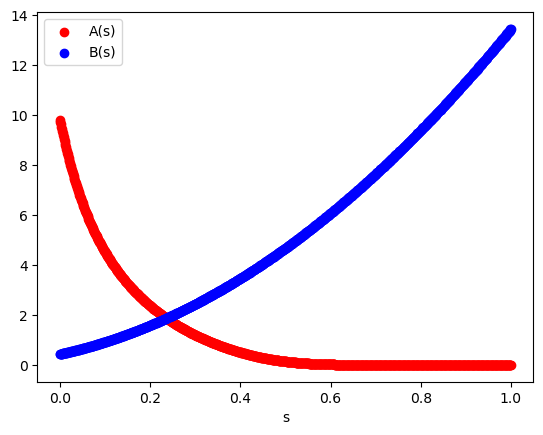

In [2]:
import matplotlib.pyplot as plt


# plot
fig, ax = plt.subplots()

ax.scatter(first_s, first_A, c = 'red', label='A(s)')
ax.scatter(first_s, first_B, c = 'blue', label='B(s)')

plt.xlabel('s')

plt.legend()

plt.show()

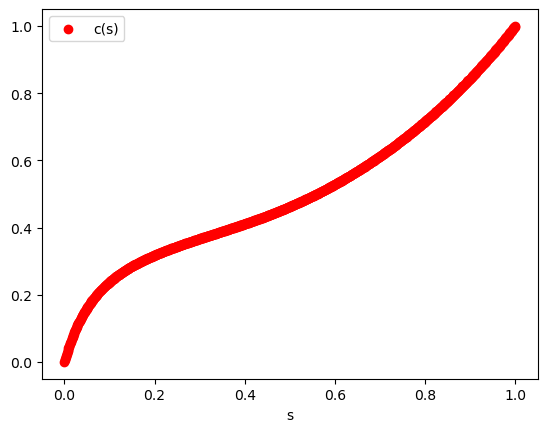

In [3]:

# plot
fig, ax = plt.subplots()

ax.scatter(first_s, first_c, c = 'red', label='c(s)')

plt.xlabel('s')

plt.legend()

plt.show()

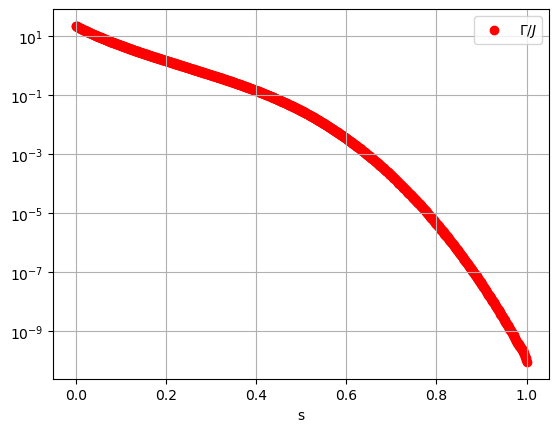

In [4]:
import matplotlib.pyplot as plt


# plot
fig, ax = plt.subplots()

ax.scatter(first_s, np.divide(first_A, first_B), c = 'red', label=r'$\Gamma/J$')
#ax.scatter(new_s, new_B, c = 'blue', label='B(s)')

plt.xlabel('s')
plt.yscale('log')
plt.legend()
plt.grid('on')
plt.show()

In [2]:
#A^2/B
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


#finer s grid
new_s = np.linspace(0,1,num = 100*len(first_s))
new_A = np.interp(new_s, first_s, first_A)
new_B = np.interp(new_s, first_s, first_B)
new_c = np.interp(new_s, first_s, first_c)

A2divB = np.divide(new_A**2,new_B)

indices = len(new_A)*np.ones(len(new_A),dtype=np.int8)
delta_c = np.zeros(len(new_A))
differences = np.zeros(len(new_A))

for i in range(len(new_A)):
    val = find_nearest(A2divB, value = new_A[i])
    differences[i]= A2divB[val] - new_A[i]
    indices[i] = val
    delta_c[i] = new_c[val] - new_c[i] 


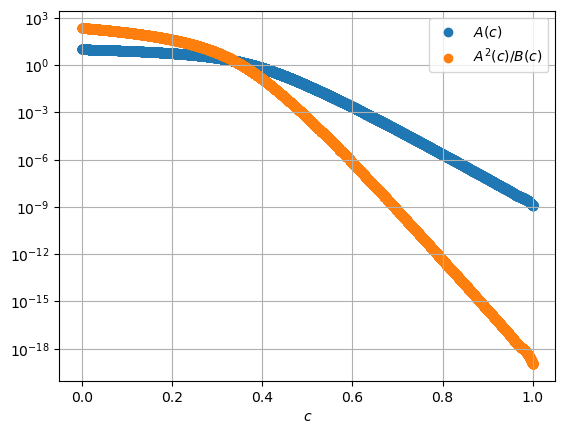

In [6]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_c, new_A, label=r"$A(c)$")
ax.scatter(new_c, A2divB,  label=r"$A^2(c)/B(c)$")
plt.xlabel(r'$c$')
plt.legend()
#plt.ylabel(r'$\delta c_2$')
ax.set_yscale('log')
plt.grid()
plt.show()

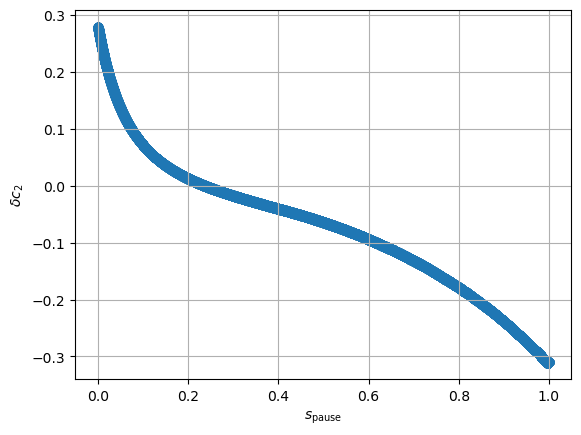

In [7]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, delta_c)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$\delta c_2$')
plt.grid()
plt.show()

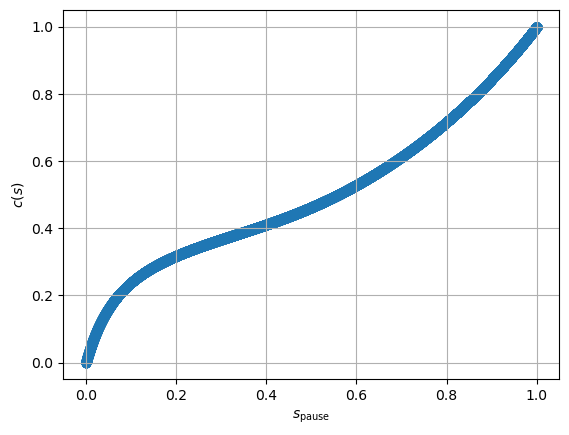

In [6]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_c)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$c(s)$')
plt.grid()
plt.show()

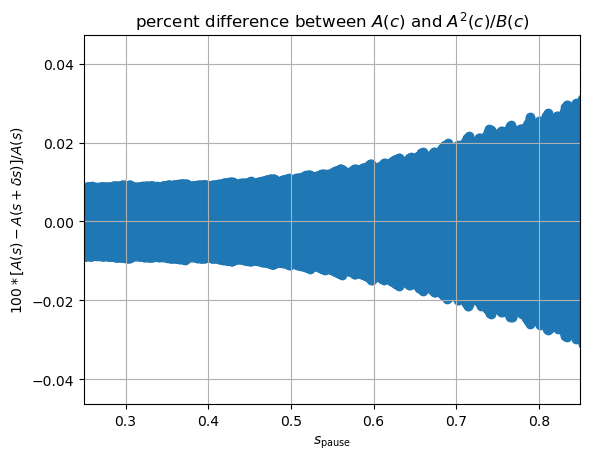

In [8]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, 100*np.divide(differences, new_A))
#ax.scatter(new_s, differences)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$100*[A(s) - A(s + \delta s)]/A(s)$')
plt.xlim([0.25, 0.85])
#plt.ylim([-50, 50])
plt.title(r"percent difference between $A(c)$ and $A^2(c)/B(c)$")
plt.grid()
plt.show()

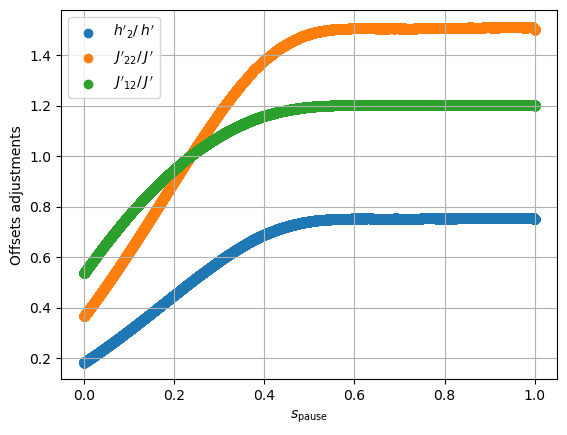

In [9]:
#h value, J_12, J_22

hoffset = np.divide(new_B,2*new_B[indices])
J22 = np.divide(new_B,new_B[indices])
J12 = np.divide(2*new_B,new_B + new_B[indices])

fig, ax = plt.subplots()

ax.scatter(new_s, hoffset, label=r"$h'_2/\:h'$")
ax.scatter(new_s, J22, label=r"$J'_{22}/\:J'$")
ax.scatter(new_s, J12, label=r"$J'_{12}/\:J'$")

plt.legend()
#ax.set_yscale('log')
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'Offsets adjustments')
plt.grid()
plt.show()


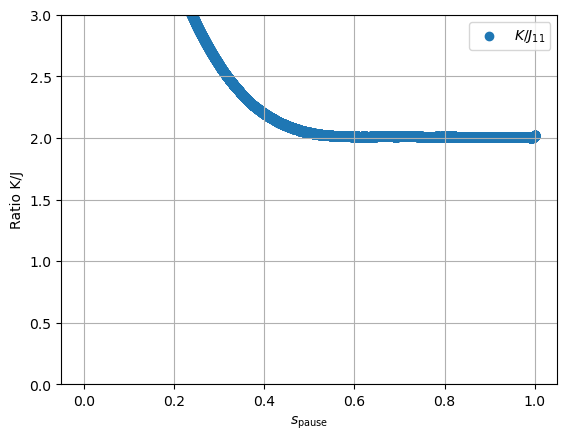

In [12]:
#h value, J_12, J_22

K = 2
Jprime = 0.66

Kcomp = K*new_B[indices]/2
J11_comp = Jprime*new_B/2
KoverJ = np.divide(new_B[indices], new_B)*K/Jprime

fig, ax = plt.subplots()

#ax.scatter(new_s, Kcomp, label=r"$K$")
#ax.scatter(new_s, J11_comp, label=r"$J_{11}$")
ax.scatter(new_s, KoverJ, label=r"$K/J_{11}$")

plt.legend()
#ax.set_yscale('log')
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'Ratio K/J')
plt.ylim([0,3])
plt.grid()
plt.show()
